<a href="https://colab.research.google.com/github/saxonmahar/Data_Science/blob/main/Association_Rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
dataset = [
    ['milk', 'bread', 'nuts'],
    ['milk', 'bread'],
    ['milk', 'bread', 'nuts'],
    ['milk', 'apple'],
    ['bread', 'apple'],
]

In [3]:
df = pd.DataFrame(dataset)
df = df.apply(lambda x: pd.Series(x.dropna().values), axis=1).fillna('')
df = df.apply(lambda row: list(filter(None, row)), axis=1)

In [4]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit_transform(df)
df_encoded = pd.DataFrame(te_data, columns=te.columns_)

In [5]:
frequent_items = apriori(df_encoded, min_support=0.5, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1)

In [6]:
print("Frequent Itemsets:\n", frequent_items)
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets:
    support       itemsets
0      0.8        (bread)
1      0.8         (milk)
2      0.6  (milk, bread)

Association Rules:
 Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [8]:
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=5, size=100)
outliers = np.array([20, 100, 105])  # Obvious outliers
data = np.concatenate((normal_data, outliers)).reshape(-1, 1)

In [9]:
z_scores = zscore(data)
outlier_z = np.where(np.abs(z_scores) > 3)[0]

In [10]:
iso_forest = IsolationForest(contamination=0.05)
pred_iforest = iso_forest.fit_predict(data)
outlier_iforest = np.where(pred_iforest == -1)[0]

In [11]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
pred_lof = lof.fit_predict(data)
outlier_lof = np.where(pred_lof == -1)[0]

In [12]:
print("Z-score outliers at index:", outlier_z)
print("Isolation Forest outliers at index:", outlier_iforest)
print("LOF outliers at index:", outlier_lof)

Z-score outliers at index: [100 101 102]
Isolation Forest outliers at index: [ 31  65  74 100 101 102]
LOF outliers at index: [ 31  74  79 100 101 102]


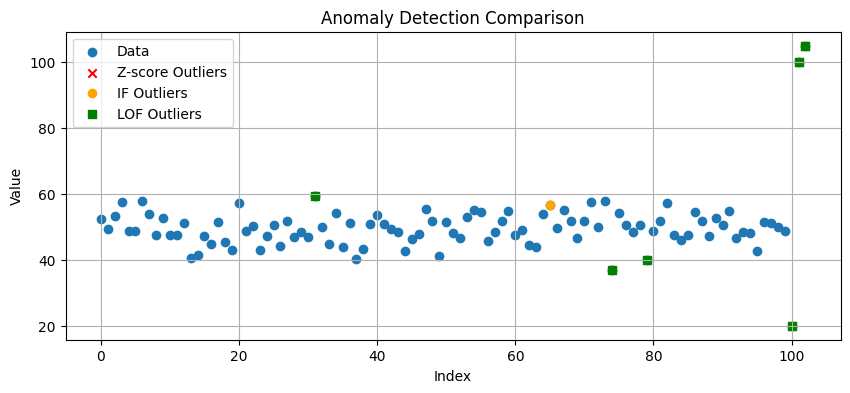

In [13]:
plt.figure(figsize=(10, 4))
plt.scatter(range(len(data)), data, label="Data")
plt.scatter(outlier_z, data[outlier_z], color='red', label="Z-score Outliers", marker='x')
plt.scatter(outlier_iforest, data[outlier_iforest], color='orange', label="IF Outliers", marker='o')
plt.scatter(outlier_lof, data[outlier_lof], color='green', label="LOF Outliers", marker='s')
plt.legend()
plt.title("Anomaly Detection Comparison")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()